In [34]:
# Polynomial Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/data3.csv')
x = df.values[:, 0].astype(np.float64)   #vector (m,)
y = df.values[:, -1].astype(np.float64)  #vector (m,)

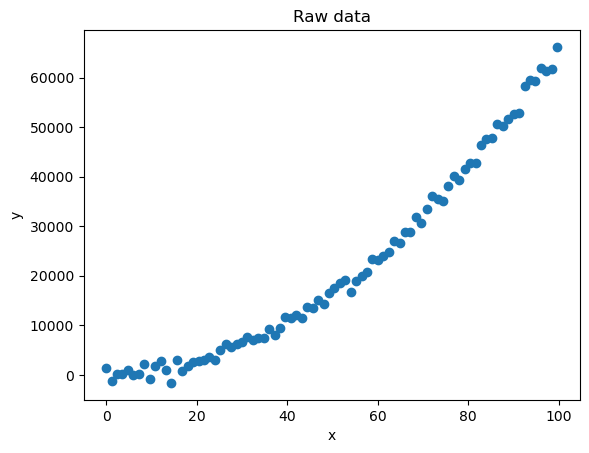

In [33]:
# plot raw data
plt.figure()
plt.scatter(x, y)
plt.title("Raw data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Degree = 2

In [32]:
# --- chuẩn hoá (feature-wise) ---
# Tính mean và std theo từng cột (axis=0)
mu = x.mean(axis=0)               # (n_features,)
sigma = x.std(axis=0, ddof=0)     # (n_features,)
# tránh chia cho 0 nếu 1 feature hằng số
sigma_safe = np.where(sigma == 0, 1.0, sigma)
xn = (x - mu) / sigma_safe        # (m, n_features)

In [31]:
# --- build matrices X, Y ---
Y = y.reshape(-1, 1)                    # m×1
m = len(y)
X = np.column_stack([np.ones(m), xn, xn**2]).astype(float)    # (m, n+1)
print(X.shape)
m, n_plus_1 = X.shape

# --- gradient descent settings (giữ tên biến của bạn) ---
ite = 20000 # iteration
lr = 0.1 # learning rate
np.random.seed(1)
theta = np.random.rand(n_plus_1, 1)                # theta: (n+1)x1
J = np.zeros(ite)

# --- gradient descent loop (vectorized, đúng kích thước) ---
for i in range(ite):
    H = X.dot(theta)                        # m×1
    grad = (1.0/m) * (X.T.dot(H - Y))       # (n+1)×1
    theta = theta - lr * grad
    J[i] = ((1.0/(2*m)) * (H - Y).T.dot(H - Y)).item()

# --- nghiệm đóng (dùng pseudo-inverse cho ổn định) ---
theta_closed = np.linalg.pinv(X).dot(Y)   # (n+1)×1

# --- show theta ---
print("Theta (gradient descent):", theta.ravel())
print("Theta (normal equation):", theta_closed.ravel())

(84, 3)
Theta (gradient descent): [16357.62899799 19049.95124222  5634.55151252]
Theta (normal equation): [16357.62899799 19049.95124222  5634.55151252]


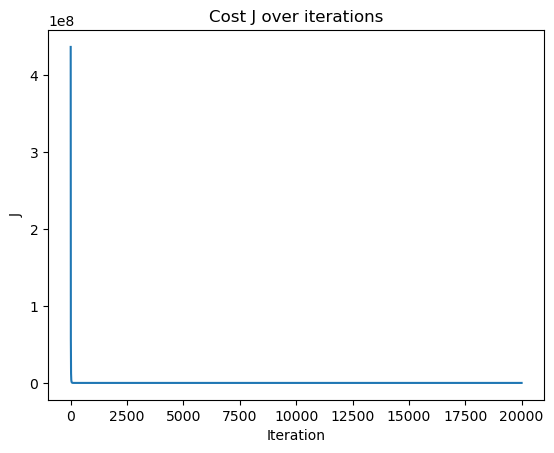

In [30]:
plt.figure()
plt.plot(np.arange(ite), J)
plt.title("Cost J over iterations")
plt.xlabel("Iteration")
plt.ylabel("J")
plt.show()



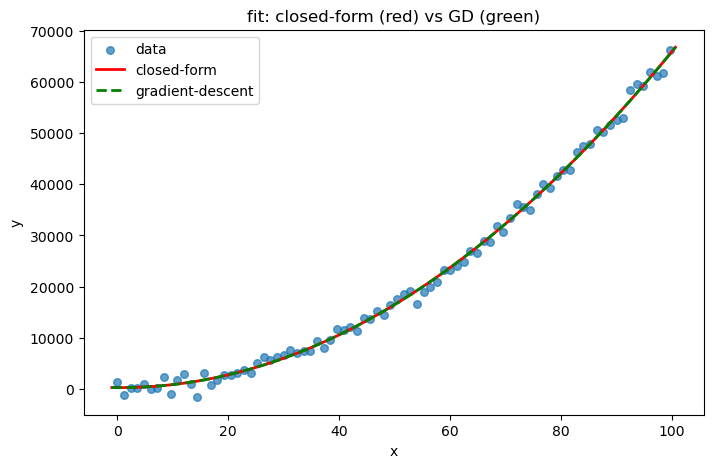

In [29]:
# generate dense xx (original x scale) and transform to standardized basis
xx = np.linspace(x.min() - 1.0, x.max() + 1.0, 500)
xxn = (xx - mu) / sigma_safe
XX = np.column_stack([np.ones(xx.shape[0]), xxn, xxn**2])

yy_gd = XX.dot(theta).ravel()
yy_closed = XX.dot(theta_closed).ravel()

plt.figure(figsize=(8,5))
plt.scatter(x, y, s=30, alpha=0.7, label='data')           # marker color like before
plt.plot(xx, yy_closed, color='red', linewidth=2, label='closed-form')
plt.plot(xx, yy_gd, color='green', linestyle='--', linewidth=2, label='gradient-descent')
plt.xlabel('x')
plt.ylabel('y')
plt.title('fit: closed-form (red) vs GD (green)')
plt.legend()
#plt.grid(True)
plt.show()